Meal columns detected: 9
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Subway]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Habit Burger]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Panda Express]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Chronic Tacos]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Hibachi-san]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Halal Shack]
 - Please rate how often you eat at each of the following

C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\366296080.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  meal_data = df[meal_cols].applymap(clean_rating)


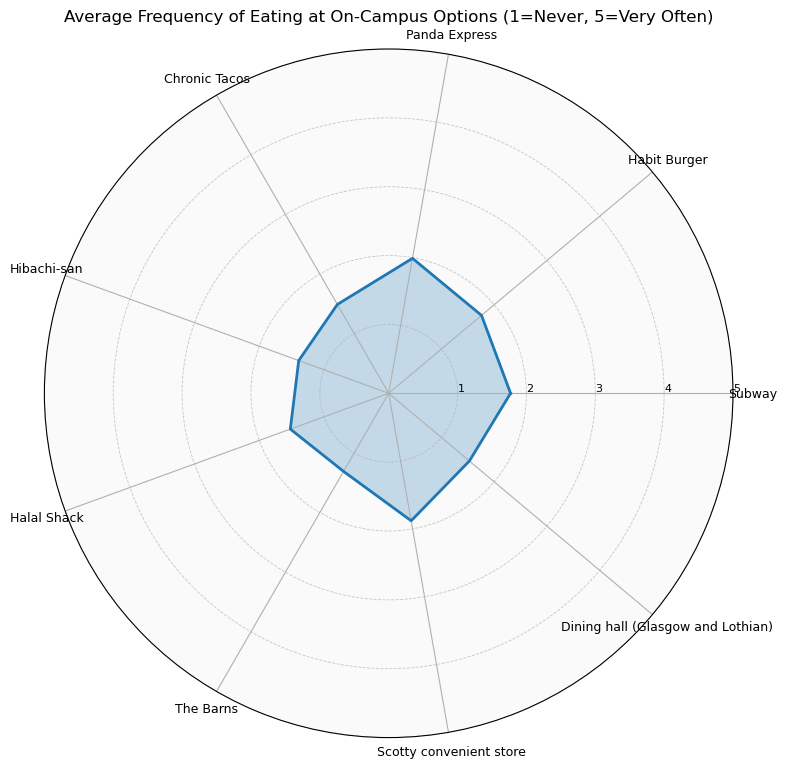

In [35]:
# Lydia's Chunk: Radar Visualization
# Average frequency of eating at on-campus options (Likert 1–5)
# On-campus meal frequency columns (EV–FE):
#   - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often).

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Select columns: on-campus meal frequency ----
meal_cols = [
    col for col in df.columns
    if "Please rate how often you eat at each of the following on-campus meal options" in col
]
print(f"Meal columns detected: {len(meal_cols)}")
for c in meal_cols:
    print(" -", c)

# ---- Clean ratings to integers 1–5 ----
def clean_rating(x):
    """
    Converts Google Form mixed strings like '5', '5.0', '5 - Very Often'
    to int 1–5; returns NaN if not parseable.
    """
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    for ch in x:
        if ch.isdigit():
            return int(ch)
    return np.nan

meal_data = df[meal_cols].applymap(clean_rating)

# ---- Compute averages (per restaurant) ----
avg_ratings = meal_data.mean().round(2)

# ---- Pretty labels (inside square brackets) ----
labels = [col.split("[")[-1].split("]")[0] for col in meal_cols]

# ---- Radar prep ----
values = avg_ratings.values.tolist()
values += values[:1]  # close loop

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# ---- Plot (Radar) ----
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle="solid", color="#1f77b4")
ax.fill(angles, values, alpha=0.25, color="#1f77b4")

# ---- Axis labels ----
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

# ---- Set explicit floor/ceiling and tick marks ----
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["1", "2", "3", "4", "5"], fontsize=8)
ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

# ---- Optional: emphasize visual spacing for ratings ----
ax.set_rlabel_position(0)
ax.set_facecolor("#fafafa")

plt.title("Average Frequency of Eating at On-Campus Options (1=Never, 5=Very Often)", pad=20)
plt.tight_layout()
plt.show()


Detected columns:
- Commute: How far is your commute to UCR (in miles)? Answer with a number only. 
- Meals: In a typical week, how many times do you eat a regular meal on campus? A "meal" refers to a substantial amount of food, such as breakfast, lunch, or dinner — not a snack. ____ times a week. (Enter a number only)


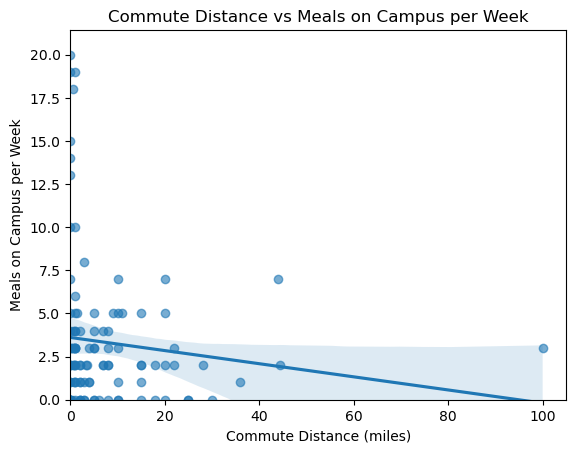

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# ---- Load dataset ----
df = pd.read_csv("responses.csv")

# ---- Normalize column headers to remove newlines and weird quotes ----
df.columns = [
    re.sub(r"\s+", " ", c.replace("“", '"').replace("”", '"').replace("’", "'")).strip()
    for c in df.columns
]

# ---- Detect the relevant columns ----
commute_col = [c for c in df.columns if "commute" in c.lower() and "ucr" in c.lower()][0]
meals_col = [
    c for c in df.columns
    if "typical week" in c.lower() and "meal" in c.lower() and "campus" in c.lower()
][0]

print("Detected columns:\n- Commute:", commute_col, "\n- Meals:", meals_col)

# ---- Clean and convert numeric columns ----
df["commute_miles"] = pd.to_numeric(df[commute_col], errors="coerce")
df["meals_per_week"] = pd.to_numeric(df[meals_col], errors="coerce")

# ---- Create scatter + regression line ----
sns.regplot(
    data=df,
    x="commute_miles",
    y="meals_per_week",
    scatter_kws={"alpha": 0.6}
)

# ---- Titles and labels ----
plt.title("Commute Distance vs Meals on Campus per Week")
plt.xlabel("Commute Distance (miles)")
plt.ylabel("Meals on Campus per Week")

# ---- Floor both axes at 0 ----
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3826725860.py:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3826725860.py:166: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)


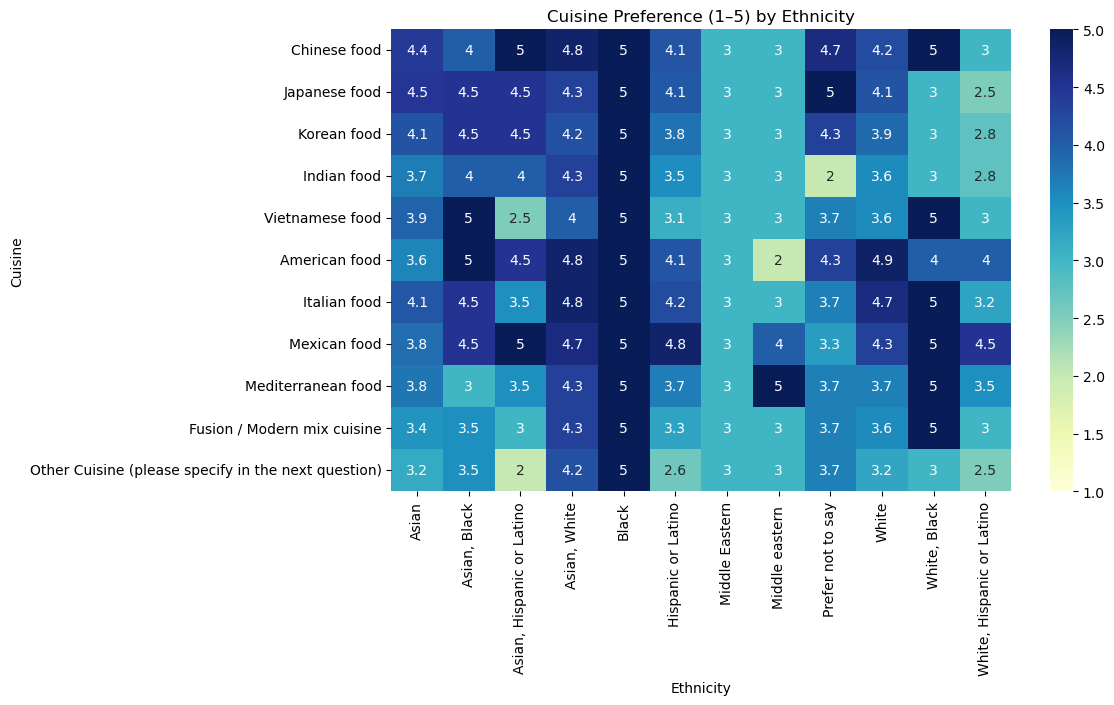

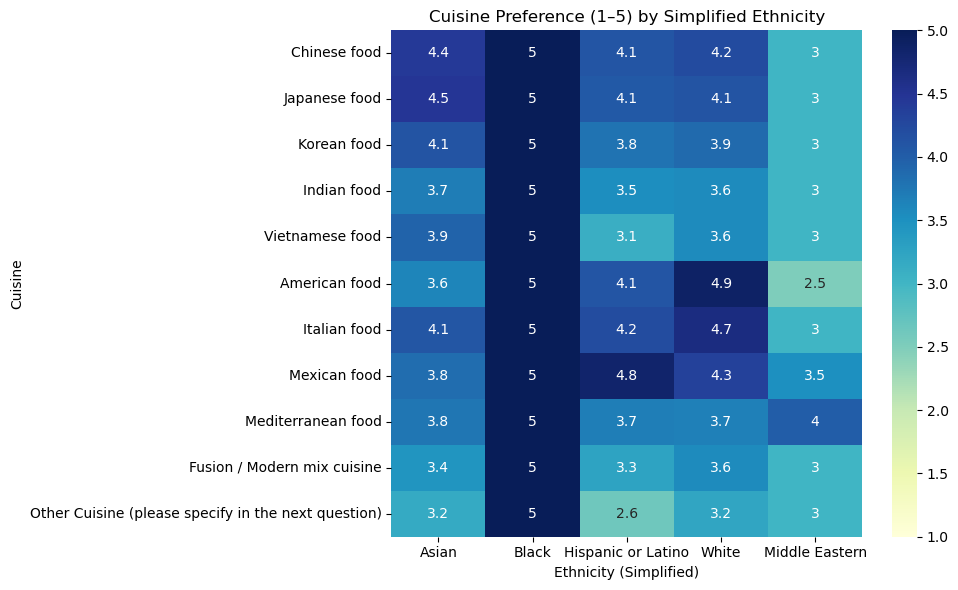

<Figure size 640x480 with 0 Axes>

In [33]:
# Lydia's Chunk: Heatmap Visualization
# Comparing cuisine preference (Likert 1–5) by ethnicity
# Ethnicity column (DM):
#   - Detected automatically (any column containing "ethnic", case-insensitive)
# Cuisine preference columns (EV–FE):
#   - Detected automatically (questions containing:
#     "Please rank the following cuisines by your preference")
#     e.g.,
#       • Please rank the following cuisines by your preference. (1 being dislike, 5 being like) [Japanese food]
#       • Please rank the following cuisines by your preference. (1 being dislike, 5 being like) [Mexican food]
#       • …

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Normalize headers (handle newlines / smart quotes) ----
def _norm(c: str) -> str:
    c = str(c)
    c = c.replace("\r", " ").replace("\n", " ")
    c = c.replace("“", '"').replace("”", '"').replace("’", "'")
    c = re.sub(r"\s+", " ", c).strip()
    return c

df.columns = [_norm(c) for c in df.columns]

# ---- Detect columns ----
eth_cols = [c for c in df.columns if "ethnic" in c.lower()]
assert eth_cols, "Could not find an ethnicity column (searching for 'ethnic')."
eth_col = eth_cols[0]

cuisine_cols = [
    c for c in df.columns
    if "please rank the following cuisines by your preference" in c.lower()
]
assert cuisine_cols, "No cuisine preference columns found."

# ---- Clean Likert values to integers 1–5 ----
def clean_rating(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip()
    # handles "5", "5.0", "5 - Like", "  4 (Neutral)  "
    for ch in s:
        if ch.isdigit():
            return int(ch)
    return np.nan

df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)

# ---- Average by ethnicity ----
mean_by_eth = df.groupby(eth_col, dropna=False)[cuisine_cols].mean()

# ---- Pretty cuisine labels (text inside [...]) ----
pretty_names = {c: c.split('[')[-1].split(']')[0] if '[' in c and ']' in c else c for c in mean_by_eth.columns}
mean_by_eth = mean_by_eth.rename(columns=pretty_names)

# ---- Heatmap ----
plt.figure(figsize=(10, 6))
sns.heatmap(mean_by_eth.T, annot=True, cmap="YlGnBu", vmin=1, vmax=5)
plt.title("Cuisine Preference (1–5) by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Cuisine")# Lydia's Chunk: Ethnicity Normalization + Heatmap
# Goal: Collapse multi-selected / messy ethnicity responses into a single canonical column
# Target categories (case-insensitive): 
#   - Asian, Black, Hispanic or Latino, White, Middle Eastern
# Rule:
#   • If exactly one of the five appears in a response → use that canonical label
#   • If ≥2 of the five appear → label as "Multiple"
#   • If none of the five appear → label as "Other"
# Then plot cuisine preference (Likert 1–5) by the simplified ethnicity.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Normalize headers (handle newlines / smart quotes) ----
def _norm(c: str) -> str:
    c = str(c)
    c = c.replace("\r", " ").replace("\n", " ")
    c = c.replace("“", '"').replace("”", '"').replace("’", "'")
    c = re.sub(r"\s+", " ", c).strip()
    return c

df.columns = [_norm(c) for c in df.columns]

# ---- Detect columns ----
eth_cols = [c for c in df.columns if "ethnic" in c.lower()]
assert eth_cols, "Could not find an ethnicity column (searching for 'ethnic')."
eth_col = eth_cols[0]

cuisine_cols = [
    c for c in df.columns
    if "please rank the following cuisines by your preference" in c.lower()
]
assert cuisine_cols, "No cuisine preference columns found."

# ---- Build ethnicity simplifier ----
# Canonical labels and keyword patterns (expand as needed)
ETH_MAP = {
    "Asian": [
        r"\basian\b", r"\beast asian\b", r"\bsouth asian\b", r"\bsoutheast asian\b",
        r"\bkorean\b", r"\bjapanese\b", r"\bchinese\b", r"\bfilipino\b", r"\bVietnamese\b", r"\bindian\b", r"\bthai\b"
    ],
    "Black": [
        r"\bblack\b", r"\bafrican american\b", r"\bafrican\b"
    ],
    "Hispanic or Latino": [
        r"\bhispanic\b", r"\blatino\b", r"\blatina\b", r"\blatinx\b", r"\blatine\b"
    ],
    "White": [
        r"\bwhite\b", r"\bcaucasian\b", r"\beuropean\b"
    ],
    "Middle Eastern": [
        r"\bmiddle[- ]eastern\b", r"\bmena\b", r"\barab(ic)?\b", r"\biranian\b", r"\bpersian\b", r"\bturk(ish)?\b", r"\bkurd(ish)?\b"
    ],
}

# Precompile regex for speed
ETH_PATTERNS = {label: re.compile("|".join(pat for pat in pats), flags=re.I) for label, pats in ETH_MAP.items()}

def simplify_ethnicity(value: str) -> str:
    if pd.isna(value):
        return "Other"
    s = str(value)
    # normalize punctuation & spacing
    s = _norm(s)
    # split common multi-select delimiters (comma, semicolon, slash)
    parts = re.split(r"[;,/]| and | & ", s, flags=re.I)
    found = set()
    for p in parts:
        for label, rx in ETH_PATTERNS.items():
            if rx.search(p):
                found.add(label)
    if len(found) == 1:
        return next(iter(found))
    elif len(found) > 1:
        return "Multiple"
    else:
        return "Other"

# Create simplified ethnicity column
df["Ethnicity_Simplified"] = df[eth_col].apply(simplify_ethnicity)

# ---- Clean cuisine Likert values to integers 1–5 ----
def clean_rating(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip()
    # handles "5", "5.0", "5 - Like", "  4 (Neutral)  "
    for ch in s:
        if ch.isdigit():
            return int(ch)
    return np.nan

df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)

# ---- Filter to the five target categories only (drop Multiple/Other) ----
target_eth = ["Asian", "Black", "Hispanic or Latino", "White", "Middle Eastern"]
df_five = df[df["Ethnicity_Simplified"].isin(target_eth)].copy()

# ---- Average by simplified ethnicity ----
mean_by_eth = df_five.groupby("Ethnicity_Simplified", dropna=False)[cuisine_cols].mean()

# ---- Pretty cuisine labels (text inside [...]) ----
pretty_names = {c: c.split('[')[-1].split(']')[0] if '[' in c and ']' in c else c for c in mean_by_eth.columns}
mean_by_eth = mean_by_eth.rename(columns=pretty_names)

# ---- Order columns by target_eth for a consistent axis order (optional) ----
mean_by_eth = mean_by_eth.reindex(index=target_eth)

# ---- Heatmap ----
plt.figure(figsize=(10, 6))
sns.heatmap(mean_by_eth.T, annot=True, cmap="YlGnBu", vmin=1, vmax=5)
plt.title("Cuisine Preference (1–5) by Simplified Ethnicity")
plt.xlabel("Ethnicity (Simplified)")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# --- Optional: if you want to see how many rows got labeled as Multiple/Other, uncomment:
# print(df["Ethnicity_Simplified"].value_counts(dropna=False))

plt.tight_layout()
plt.show()
